In [2]:
import sys 
from tools_tolgay import functions_readfiles as read_files
from tools_tolgay.functions_importing_observations import read_CO_observations

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

/scratch/dtolgay/tools_tolgay/functions_importing_observations.py:870: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fdir, sep='\s+', names=column_names, header=None)


In [39]:
base_fdir = "/scratch/dtolgay/cloudy_runs/z_0/m12i_res7100_md_test"

runs = {
    "expected": {
        "file_path_luminosity": f"{base_fdir}/L_line_smoothingLength_expected_flux2Luminosity.txt",
        "file_path_abundance": f"{base_fdir}/otherProperties_smoothingLength_expected.txt",
        "data": pd.DataFrame(),
        "label": "expected",
    },
    "hybridNDInterp": {
        "file_path_luminosity": f"{base_fdir}/L_line_smoothingLength_hybridInterpolator_flux2Luminosity.txt",
        "file_path_abundance": f"{base_fdir}/otherProperties_smoothingLength_hybridInterpolator.txt",
        "data": pd.DataFrame(),
        "label": "hybridND",        
    },
    "nearestNDInterp": {
        "file_path_luminosity": f"{base_fdir}/L_line_smoothingLength_nearestNDInterpolator_flux2Luminosity.txt",
        "data": pd.DataFrame(),
        "label": "nearestND",
    },    
    "regularGridInterp": {
        "file_path_luminosity": f"{base_fdir}/line_emissions_regularGridInterpolator_linear_smoothingLength.txt",
        "file_path_abundance": f"{base_fdir}/abundance_regularGridInterpolator_linear_smoothingLength.txt",
        "data": pd.DataFrame(),
        "label": "regularGridND",
    },      
    "rbfInterp": {
        "file_path_luminosity": f"{base_fdir}/line_emissions_RBFInterpolator_smoothingLength_2.txt",
        "file_path_abundance": f"{base_fdir}/abundance_RBFInterpolator_smoothingLength_2.txt",
        "data": pd.DataFrame(),
        "label": "RBF Interpolator",
    }
}

interpolation_type = "abundance" # abundance, temperature, line_emissions
file_path_key = f"file_path_abundance"
for run in runs.keys():
    if run == "nearestNDInterp" and interpolation_type != "line_emissions":
        continue
    try: 
        runs[run]["data"], file_specific_columns = read_files.read_interpolated_files_usingFilePath(path=runs[run][file_path_key], interpolation_type=interpolation_type)
    except:
        runs[run]["data"], file_specific_columns = read_files.read_interpolated_files_usingFilePath2(path=runs[run][file_path_key], interpolation_type=interpolation_type)


if interpolation_type != "line_emissions":
    # Delete the nearestNDInterp if the interpolation type is not line_emissions
    del runs["nearestNDInterp"]




In [ ]:
# plt.scatter(
#     runs["regularGridInterp"]["data"]["density"],
#     runs["regularGridInterp"]["data"]["T"],
# )
# plt.xscale("log")
# plt.yscale("log")
# plt.show()


# plt.scatter(
#     runs["regularGridInterp"]["data"]["T"],
#     runs["regularGridInterp"]["data"]["Th2"],
# )
# plt.xscale("log")
# plt.yscale("log")


KeyError: 'T'

In [7]:
# from scipy.interpolate import RBFInterpolator
import scipy
print(scipy.__version__)

1.15.1


# Import observations 

In [10]:
XCOLDGASS_df, PHIBBS2_df, ALMA_df, Leroy_df = read_CO_observations(base_dir="/home/dtolgay/Observations")

I am in the function XCold_Gass_data_reading
<TableColumns names=('ID','SDSS','OBJID','SPECOBJID','PLATEID','MJD','FIBERID','RA','DEC','Z_SDSS','LUMDIST','INCL','NUVR','R50KPC','LOGMSTAR','LOGMUST','CINDX','WEIGHT','LOGSFR_MPAJHU','LOGSFR_SED','LOGSFR_BEST','LOGSFR_ERR','FLAG_IRAS','LOGLIR_IRAS','IRCOL_IRAS','N2HA','O3HB','AGNCLASS','Z_PP04_N2','Z_PP04_O3N2','Z_MZR','FLAG_CO','XCO','XCO_A17','XCO_A17_ERR','ICO','ICO_ERR','ICO_COR','ICO_COR_ERR','LCO','LCO_ERR','LCO_COR','LCO_COR_ERR','RMS_CO','SN_CO','WCO','WCO_FLAG','Z_CO','WCO_TFR','WCO_TFR_ERR','LOGMH2','LOGMH2_ERR','LIM_LOGMH2','LOGMH2MS','FLAG_CO21','ICO21','ICO21_ERR','LCO21','LCO21_ERR','RMS_CO21','SN_CO21','WCO21','WCO21_FLAG','Z_CO21','FLAG_APEX','ICO_APEX','LCO_APEX','RMS_APEX','SN_APEX','WCO_APEX','ZCO_APEX')>
I am in the function PHIBSS2_data_reading
I am in the function ALMA_2019_Data_Reading
I am in the function Leroy_data_reading
average_radius_r25_times_075_LEROY:  8.886206896551723


# Compare

### Line Emissions

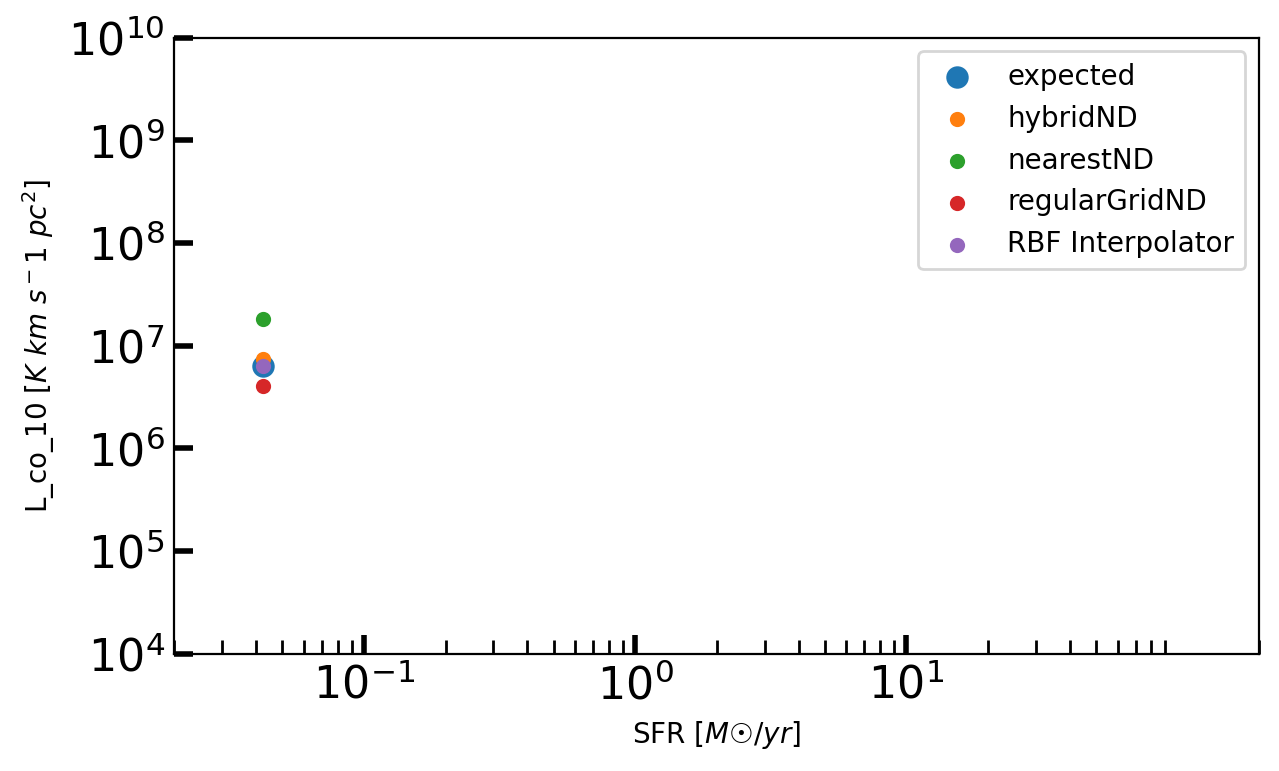

In [17]:
line_name = "L_co_10"



fig, ax = plt.subplots(figsize=(7, 4), dpi = 200, facecolor = "white")

# ############ xCOLDGASS

# cond_FLAG_1 = (XCOLDGASS_df["FLAG_CO"] == 1).astype(bool)
# cond_FLAG_2 = (XCOLDGASS_df["FLAG_CO"] == 2).astype(bool)
# ax.scatter(
#     XCOLDGASS_df.loc[cond_FLAG_1, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_1, 'Lco'], 
#     facecolors='none', edgecolors='tab:blue', label="Saintonge+17", s=10,
# )
# ax.scatter(
#     XCOLDGASS_df.loc[cond_FLAG_2, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_2, 'Lco'], 
#     marker=r"$\downarrow$", s=10, facecolors='none', edgecolors='tab:cyan', label=r"Saintonge+17 3$\sigma$ upper limit"
# )


for run in runs.keys():
    if run == "expected":
        s = 50
    else:
        s = 20

    ax.scatter(
        sum(runs[run]['data']['sfr']),
        sum(runs[run]['data'][line_name]),
        label = runs[run]['label'],
        s = s,
    )


## Figure options
axes_number_size = 16

plt.yscale("log")
plt.xscale("log")

# plt.grid(which = "minor")

plt.xlabel("SFR [$M☉/yr$]")
plt.ylabel(fr"{line_name} [$K$ $km$ $s^{-1}$ $pc^2$]")

ymin = 1e4
ymax = 1e10
difference_in_log_space = int(np.log10(ymax/ymin))
yticks = 10**np.linspace(start = np.log10(ymin), stop = np.log10(ymax), num=difference_in_log_space+1)

plt.ylim([ymin, ymax])
plt.yticks(yticks)
plt.legend()

plt.xlim([2e-2, 2e2])
plt.xticks([1e-1, 1e0, 1e1])


# # Customize major ticks
ax.tick_params(axis='both', which='major', labelsize=axes_number_size, length=7, width=2, colors='black', direction = "in")
ax.tick_params(axis='both', which='minor', labelsize=axes_number_size, length=5, width=1, colors='black', direction = "in")

plt.show()

In [18]:
for run in runs.keys():
    label = runs[run]['label']
    Lco = sum(runs[run]['data']['L_co_10'])
    print(f"{label}: Lco: {Lco:.2e}")


expected: Lco: 6.36e+06
hybridND: Lco: 7.36e+06
nearestND: Lco: 1.83e+07
regularGridND: Lco: 4.07e+06
RBF Interpolator: Lco: 6.27e+06


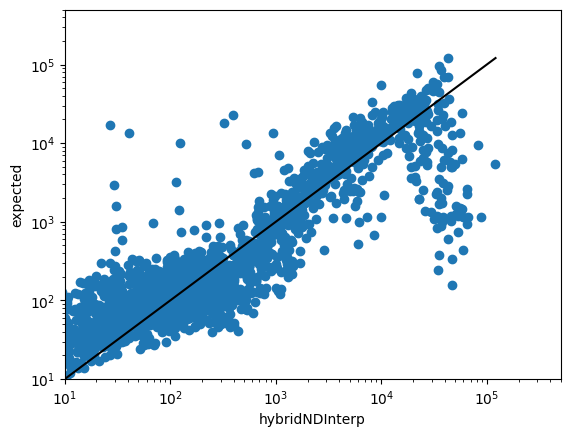

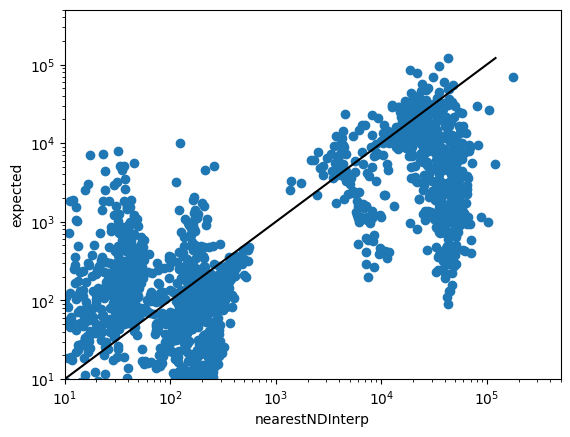

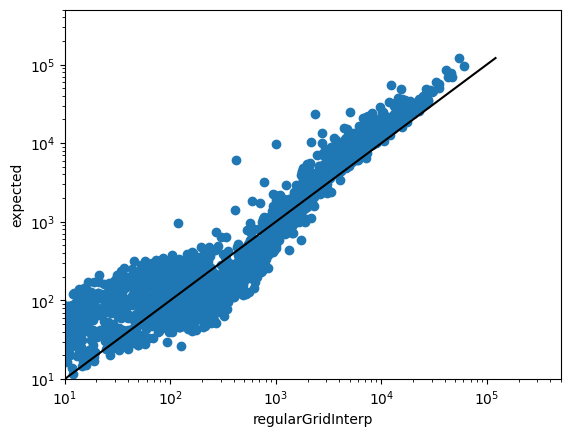

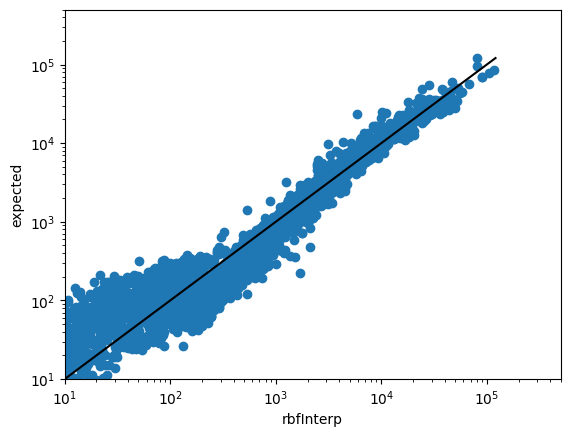

In [ ]:
x = np.linspace(0, max(runs['expected']['data']['L_co_10']), num=int(1e3))
y = x

for run in runs.keys():
    if run != 'expected':
        plt.figure()
        
        plt.scatter(
            runs[run]['data']['L_co_10'],
            runs['expected']['data']['L_co_10'],            
        )
        
        plt.xlabel(run)
        plt.ylabel("expected")
        
        plt.plot(x,y,c="Black")
        plt.xscale("log")
        plt.yscale("log")
        plt.xlim([1e1, 5e5])
        plt.ylim([1e1, 5e5])  
        
        plt.show()
        

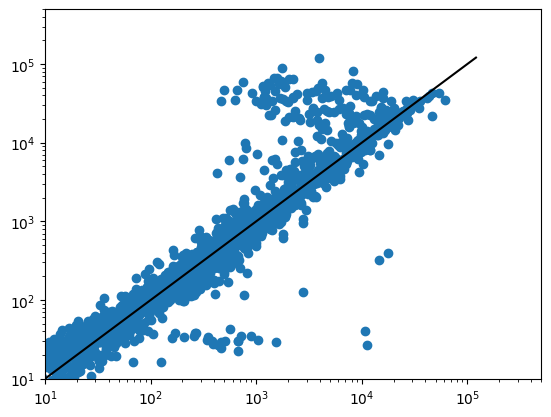

In [20]:
plt.scatter(
    runs['regularGridInterp']['data']['L_co_10'],
    runs['hybridNDInterp']['data']['L_co_10'],            
)

plt.plot(x,y,c="Black")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e1, 5e5])
plt.ylim([1e1, 5e5])  

plt.show()

### Abundance

In [33]:
runs['hybridNDInterp']['data'].columns

Index(['x', 'y', 'z', 'smoothing_length', 'mass', 'metallicity', 'temperature',
       'vx', 'vy', 'vz', 'hden', 'radius', 'sfr', 'turbulence', 'density',
       'mu_theoretical', 'average_sobolev_smoothingLength', 'index', 'isrf',
       'fh2', 'fCO'],
      dtype='object')

expected
hybridNDInterp


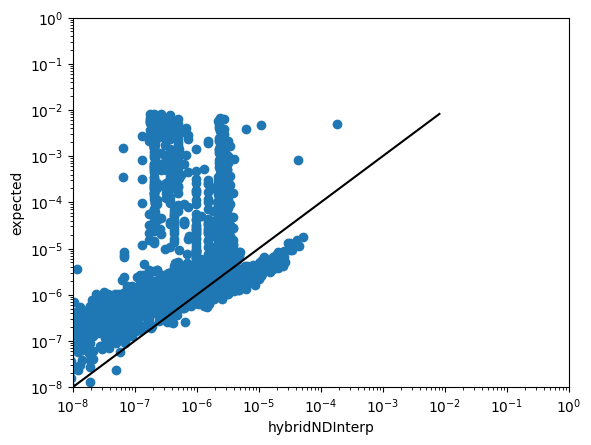

regularGridInterp


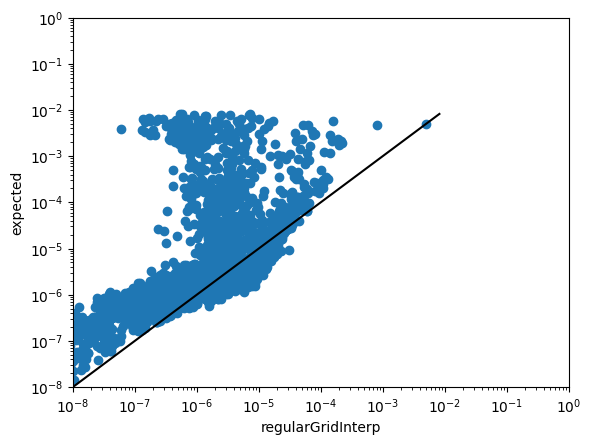

rbfInterp


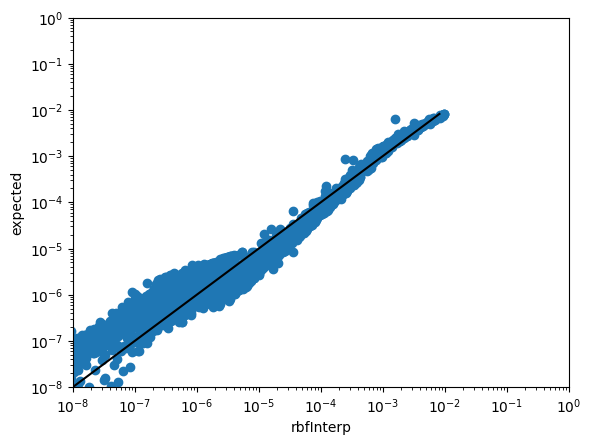

In [42]:
x = np.linspace(0, max(runs['expected']['data']['fCO']), num=int(1e3))
y = x

for run in runs.keys():
    print(run)

    if run != 'expected':
        plt.figure()
        
        plt.scatter(
            runs[run]['data']['fCO'],
            runs['expected']['data']['fCO'],            
        )
        
        plt.xlabel(run)
        plt.ylabel("expected")
        
        plt.plot(x,y,c="Black")
        plt.xscale("log")
        plt.yscale("log")

        plt.xlim([1e-8, 1])
        plt.ylim([1e-8, 1])

        plt.show()
        

expected
hybridNDInterp


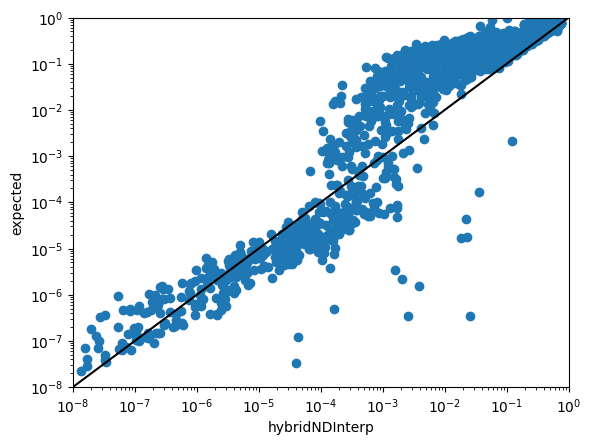

regularGridInterp


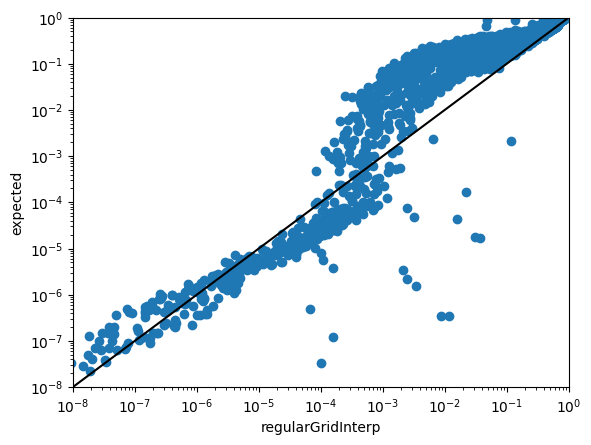

rbfInterp


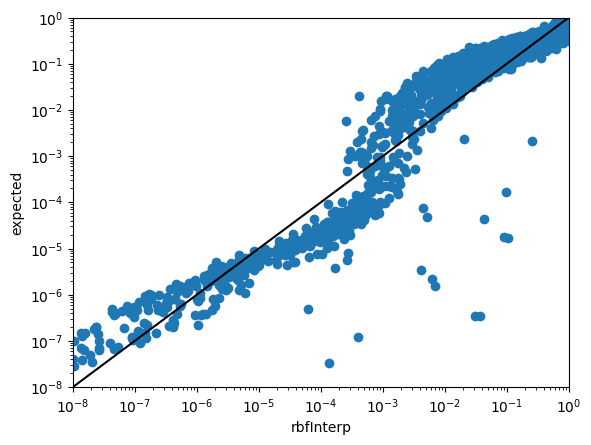

In [44]:
x = np.linspace(0, max(runs['expected']['data']['fh2']), num=int(1e3))
y = x

for run in runs.keys():
    print(run)

    if run != 'expected':
        plt.figure()
        
        plt.scatter(
            runs[run]['data']['fh2'],
            runs['expected']['data']['fh2'],            
        )
        
        plt.xlabel(run)
        plt.ylabel("expected")
        
        plt.plot(x,y,c="Black")
        plt.xscale("log")
        plt.yscale("log")

        plt.xlim([1e-8, 1])
        plt.ylim([1e-8, 1])

        plt.show()
        